# Menggambar Grafik Precision-Recall & Membangun Powerful Classifier untuk dataset MNIST
## NRP : 2372061       
## Nama : Laura
## Kelas (A/B/C) : C

# <a id="home">Deskripsi Praktikum</a>

**Bagian pertama** dari praktikum akan menuntun Anda untuk menggambar kurva precision dan recall sedangkan **bagian kedua** akan mengimplementasi satu classifier yang _powerful_ yang akan memperoleh akurasi $97\%$ pada dataset MNIST.    

Bagian pertama akan menggunakan dataset Pima Indian Diabetes dan bagian kedua akan menggunakan dataset MNIST.

## Bagian Pertama

In [ ]:
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Buatlah variabel dengan nama `filename` dan isi variabel bertipe `string`, yaitu `pima-indians-diabetes.data.csv`.

In [ ]:
filename = "pima-indians-diabetes.data.csv"

Buatlah list bernama `names` dengan nilai string, yaitu: `preg`, `plas`, `pres`, `skin`, `test`, `mass`, `pedi`, `age`, dan `class`.

In [ ]:
names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]

Gunakan method `read_csv` dengan parameter: `filename` dan `names` adalah `names`. Simpan hasil `read_csv` dalam variabel `dataframe`.

In [ ]:
dataframe = read_csv(filename, names=names)

Simpan semua nilai `dataframe` ke dalam variabel `array`.      

**Hint**: gunakan _attribute_ `values` dari `dataframe`.

In [ ]:
array = dataframe.values

Extract semua baris dan kolom ke-1 s.d. ke-8 ke dalam variabel `X`.

In [ ]:
X = array[:,:8]

Simpan semua baris dari kolom ke-9 ke dalam variabel `y`.

In [ ]:
y = array[:,8]

Buatlah variabel yang bernama `seed` dengan nilai `7`.

In [ ]:
seed = np.random.seed(7)


## <a id="k-fold">$k$-fold Cross-Validation</a> (Back to [Home](#home))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Buatlah `KFold` dengan parameter `n_splits=10` dan simpan dalam varibel `kfold`.

In [ ]:
kfold = KFold(n_splits=10)

Buatlah `model` yang merupakan model `LogisticRegression` dengan parameter `solver` adalah `liblinear`.

In [ ]:
model = LogisticRegression(solver='liblinear')

Hitunglah prediksi kita, yaitu `y_pred` dengan `cross_val_predict`.    
Dokumentasi penjelasan `cross_val_predict` dapat Anda baca di [**sini**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html).

In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, X, y, cv=kfold)

Buatlah _confusion matrix_ dari hasil prediksi (`y_pred`) dan nilai sebenarnya (`y`).

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)

In [ ]:
cm

array([[446,  54],
       [123, 145]])

Cobalah hitung _precision_ dari classifier Anda.

In [ ]:
from sklearn.metrics import precision_score

precision_score(y, y_pred)


0.7286432160804021

Cobalah hitung _recall_ dari classifier Anda.

In [ ]:
from sklearn.metrics import recall_score

recall_score(y, y_pred)

0.5410447761194029

### Pertanyaan Refleksi
1. Apakah nilai _precision_ lebih besar daripada nilai _recall_? Ataukah sebaliknya?
2. Jika nilai _precision_ lebih besar daripada nilai _recall_ atau sebaliknya, apakah artinya?

1. Nilai Precision (0.72) lebih besar dari nilai Recall (0.54)
2. Nilai Precision lebih besar berarti nilai False Positive lebih kecil dari False Negatif. Hal ini menandakan bahwa model menganggap False Positif lebih berbahaya.

**Jawab**:     
  

Cobalah hitung $F_1$ score dari classifier Anda.      
Seharusnya nilai $F_1$ score $\ge 61 \%$.

In [ ]:
from sklearn.metrics import f1_score

f1_score(y, y_pred)


0.6209850107066381

Mari kita hitung `y_scores` yang adalah pemanggilan `cross_val_predict` dengan argumen sbb:  
- `model`,
- `X`,
- `y`,
- `cv` adalah `kfold`, dan
- `method` adalah `"decision_function"`

Referensi yang menjelaskan `method`: `predict`, `predict_proba`, dan `decision_function` dapat dibaca di [**sini**](https://medium.com/@preethi_prakash/mastering-machine-learning-predictions-in-scikit-learn-25e86881a70e).

In [ ]:
y_scores = cross_val_predict(model, X, y, cv=kfold,method="decision_function")

Mari kita gambar kurva precision vs. recall dengan pertama-tama memanggil `precision_recall_curve` dan argumen sbb:
- `y` dan
- `y_scores`.

In [ ]:
from sklearn.metrics import precision_recall_curve

threshold = 0

precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

Berikut grafik precision & recall versus the decision threshold.

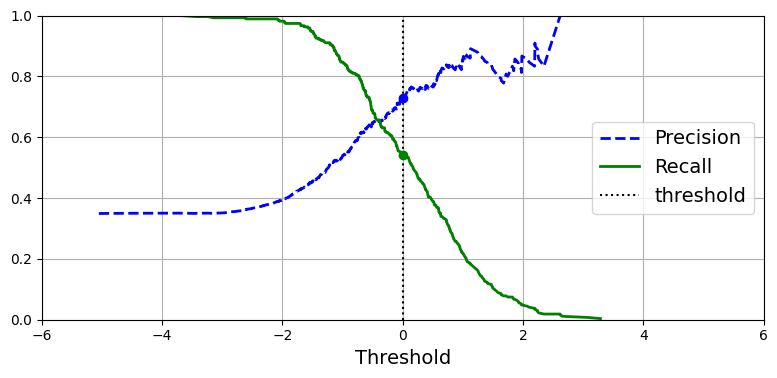

In [ ]:
#################################
# DO NOT CHANGE THE CODE BELOW
#################################
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-6, 6, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

Selanjutnya, kita gambar kurva precision vs. recall.

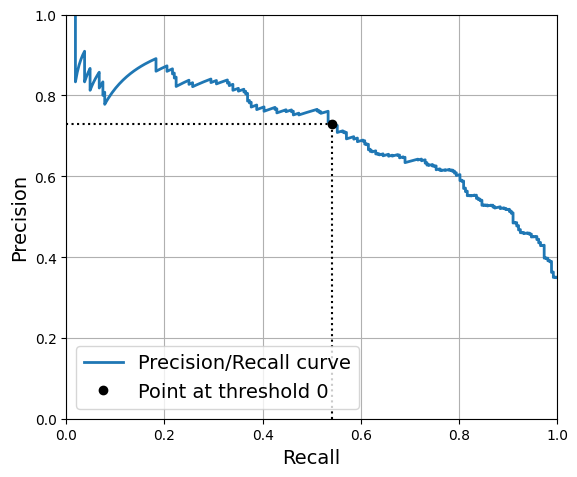

In [ ]:
#################################
# DO NOT CHANGE THE CODE BELOW
#################################
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 0")
# plt.gca().add_patch(patches.FancyArrowPatch(
#     (0.79, 0.60), (0.61, 0.78),
#     connectionstyle="arc3,rad=.2",
#     arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#     color="#444444"))
# plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

Selanjutnya, kita coba menghitung ROC _Area Under Curve_ (AUC)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_scores)

0.8246194029850746

Kita akan mencoba classifier yang lain, yaitu `RandomForestClassifier`.      
Gunakan `random_state` yang bernilai `42` sebagai argumen.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest_clf = RandomForestClassifier(random_state=42)

Kembali kita gunakan `cross_val_predict` sama seperti ketika kita menggunakan LogisticRegression tetapi kali ini `method`-nya adalah `predict_proba`.

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X,y, cv=kfold,
 method="predict_proba")

Mari kita ambil `score` hasil prediksi dan kita simpan di `y_scores_forest` kemudian kita panggil `precision_recall_curve`.

In [ ]:
y_scores_forest = y_probas_forest[:, 1]

precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y, y_scores_forest)

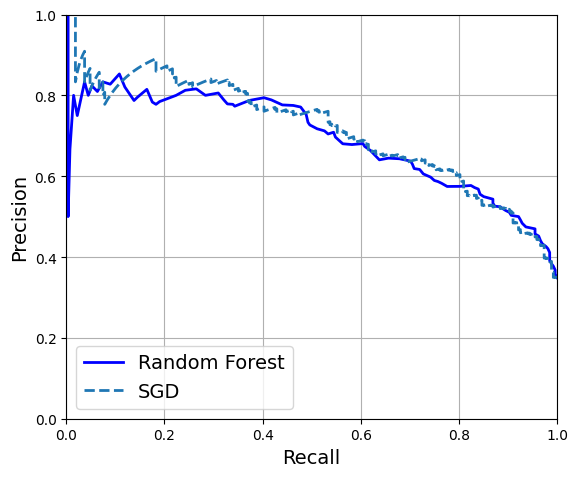

In [ ]:
#################################
# DO NOT CHANGE THE CODE BELOW
#################################
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

Selanjutnya, kita coba menghitung ROC _Area Under Curve_ (AUC) dari Random Forest classifier ini.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_scores_forest)

0.823

### Pertanyaan Refleksi
- Menurut pendapat Anda, bagaimana perbandingan _performance_ antara Logistic Regression dengan Random Forest?

**Jawab**:     


Dalam performance Logistic Regression memiliki awal yang tinggi namun Random Forest memiliki awal yang tajam ke bawah baru naik lagi. Overall performance LogRes lebih tinggi dari RandForest walau akhirnya sama (dengan recall lebih tinggi) yaitu dibawah 0.4 jika

## Bagian Kedua
Kita akan mencoba membuat _classifier_ untuk dataset MNIST yang akan mencapai lebih dari 97% akurasi pada test set.    
**Petunjuk**: `KNeighborsClassifier` akan _perform_ cukup baik untuk task ini; Anda hanya perlu menemukan nilai hyperparameter yang terbaik (coba gunakan _grid search) pada hyperparameter `weights` dan `n_neighbors`).

Mari kita load dataset MNIST.

In [ ]:
#################################
# DO NOT CHANGE THE CODE BELOW
#################################
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

Kita siapkan `X` dan `y`-nya.

In [ ]:
#################################
# DO NOT CHANGE THE CODE BELOW
#################################
X, y = mnist.data, mnist.target

Mari kita bagi `X` dan `y` menjadi 60000 gambar untuk train set dan 10000 untuk test set.

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Kita import classifier yang bernama $k$-_nearest neigbors_ (knn).

In [ ]:
#################################
# DO NOT CHANGE THE CODE BELOW
#################################
from sklearn.neighbors import KNeighborsClassifier

Kita buat classifier dari kelas `KNeighborsClassifier`.

In [ ]:
knn_clf = KNeighborsClassifier()

Kita _train_ `knn_clf` pada `X_train` dan `y_train`.

In [ ]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

Mari kita hitung _accuracy_ dari classifier knn.

In [ ]:
baseline_accuracy = knn_clf.score(X_test, y_test)

Silakan Anda tampilkan accuracy baseline ini.      
Accuracy baseline $\approx 96\%$

In [ ]:
print(f"baseline_accuracy = {baseline_accuracy} = {baseline_accuracy*100}%")

baseline_accuracy = 0.9688 = 96.88%


Mari kita import `GridSearchCV` untuk mencari best hyperparameter.

In [ ]:
from sklearn.model_selection import GridSearchCV

Berikut hyperparameter knn yang mau diujicobakan:

In [ ]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

### Pertanyaan Refleksi
Ada berapa jumlah setting hyperparameter yang akan diujicobakan dari `param_grid`?

**Jawab**: 8

Mari kita bentuk instance dari kelas `KNeighborsClassifier`.

In [ ]:
knn_clf = KNeighborsClassifier()

Selanjutnya, kita lakukan _Grid Search_ dengan menggunakan kelas `GridSearchCV` dan 5-fold cross-validation.     
Dokumentasi GridSearchCV dapat dibaca di [**sini**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)

Eksekusi `grid_search` dengan memanggil method `fit`.    
Untuk mempersingkat waktu, kita coba hanya menggunakan 10000 gambar yang pertama

In [ ]:
grid_search.fit(X[:10000], y[:10000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

Tampilkan best hyperparameter dari hasil Grid Search.

In [ ]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

Tampilkan nilai score terbaik dari hasil `grid_search`.

In [ ]:
grid_search.best_score_

0.9441999999999998

Latihlah model dengan best hyperparameter pada train set.

In [ ]:
best_knn_clf =  KNeighborsClassifier()
best_knn_clf.fit(X,y)

KNeighborsClassifier()

Setelah model ini dilatih, evaluasi model yang sudah dilatih pada test set.

In [ ]:
tuned_accuracy = best_knn_clf.score(X_test,y_test)

Tampikan isi dari `tuned_accuracy` yang merupakan akurasi model knn dengan best hyperparameter pada test set.

In [ ]:
print(tuned_accuracy)


0.9814


Hore, kita bisa mencapai akurasi 97%! 🥳

<h2><center>The End</center></h2>